In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [17]:
# General settings
import matplotlib as mpl
mpl.rc_file('/Users/ulyanadupletsa/Documents/PhDThesisPlots/matplotlibrc')

In [18]:
colors = ['#2a9d8f', '#2a9d8f', '#e76f51', '#e76f51', '#eba75f', '#eba75f', '#2f4f4f', '#2f4f4f']

In [19]:
PATH_TO_DATA = '/Users/ulyanadupletsa/Documents/KN/results_10years_v2/'

In [20]:
detectors_ntw = ['ET_2L_15_cryo_45deg_2CE','ET_delta_10_cryo_2CE','ET_2L_15_cryo_45deg_1CE',
'ET_delta_10_cryo_1CE','ET_2L_15_cryo_45deg_LVKI','ET_2L_15_cryo_45deg','ET_delta_10_cryo_LVKI',
'ET_delta_10_cryo']

lbs_list = ['ET-2L+2CE', 'ET-$\Delta$+2CE', 'ET-2L+1CE', 'ET-$\Delta$+1CE',
'ET-2L+LVKI', 'ET-2L', 'ET-$\Delta$+LVKI', 'ET-$\Delta$']
				

lbs = ['network_SNR', 'chirp_mass', 'mass_ratio', 'luminosity_distance', 'dec', 'ra', 'theta_jn',
	   'psi', 'geocent_time', 'phase', 'redshift', 'lambda_1', 'lambda_2', 'err_chirp_mass', 
	   'err_mass_ratio', 'err_luminosity_distance', 'err_dec', 'err_ra', 'err_theta_jn',
	   'err_psi', 'err_geocent_time', 'err_phase', 'err_lambda_1', 'err_lambda_2', 'err_sky_location']

In [21]:
params = ['luminosity_distance', 'theta_jn', 'chirp_mass', 'lambda_1']
xaxis_lbs_list = ['Luminosity distance', 'Inclination angle', 'Chirp Mass', 'Tidal deformability 1']

In [22]:
my_alpha = 0.1
my_linewidth = 1.5

/var/folders/h7/9cf4n2f137zdvy422j_dnbcw0000gn/T/ipykernel_92882/179227758.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[j].legend(title=xaxis_lbs_list[j], title_fontsize = 20, frameon=False)
/var/folders/h7/9cf4n2f137zdvy422j_dnbcw0000gn/T/ipykernel_92882/179227758.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[j].legend(title=xaxis_lbs_list[j], title_fontsize = 20, frameon=False)
/var/folders/h7/9cf4n2f137zdvy422j_dnbcw0000gn/T/ipykernel_92882/179227758.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[j].legend(title=xaxis_lbs_list[j], title_fontsize = 20, frameon=False)
/var/folders/h7/

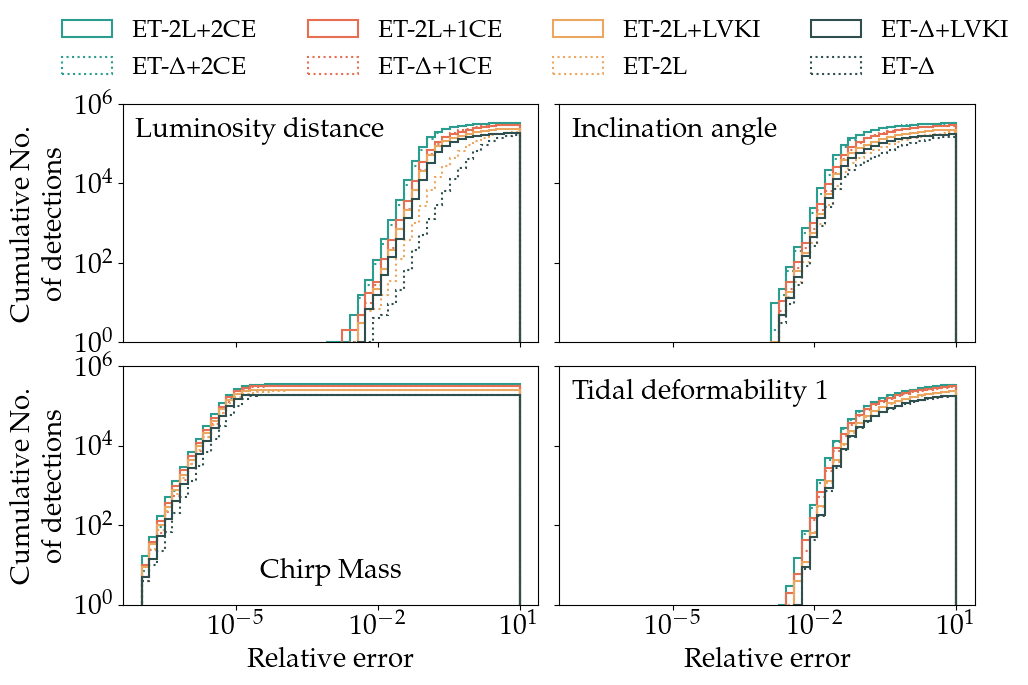

In [23]:
alpha = '1.0'
eos = 'BLh_uniform'

mpl.rc('xtick', labelsize = 20) 
mpl.rc('ytick', labelsize = 20)

# plot cumulative histograms of relative errors
fig, axs = plt.subplots(2,2,figsize = (11,6.5), sharex = True, sharey = True)

ax = axs.ravel()

for i in range(len(detectors_ntw)):
    df = pd.read_csv('%s/%s/%s/%s/Errors_%s_%s_%s.txt' %(str(PATH_TO_DATA), str(alpha), str(eos), 
                        str(detectors_ntw[i]), str(alpha), str(eos), str(detectors_ntw[i])),
                        names = lbs, skiprows = 1, delimiter = ' ')

    if i%2 == 0:
        my_linestyle = 'solid'
    else:
        my_linestyle = 'dotted'

    # relative errors
    for j, param in enumerate(params):
        ax[j].hist(df['err_%s' %param]/df[param], bins = np.logspace(-7, 1, 50), cumulative = True, color = colors[i], 
                histtype='step', linestyle=my_linestyle, linewidth=my_linewidth)
        #sns.histplot(df['err_%s' %param]/df[param], binwidth = 0.25, cumulative = True, color = colors[i], fill=False,
        #        element='step', linestyle=my_linestyle, linewidth=my_linewidth, ax = ax[j], log_scale=(True, True))
        if j%2 == 0:
            ax[j].set_ylabel('Cumulative No. \n of detections', fontsize = 20)
        else:
            ax[j].set_ylabel('')
        
        ax[j].legend(title=xaxis_lbs_list[j], title_fontsize = 20, frameon=False)
        ax[j].set_xscale('log')
        ax[j].set_yscale('log')
        #ax[j].set_xlim(10**-7, 10)
        ax[j].set_ylim(1, 10**6)

ax[2].set_xlabel('Relative error', fontsize = 20)
ax[3].set_xlabel('Relative error', fontsize = 20)
fig.subplots_adjust(hspace = 0.1, wspace = 0.05)
fig.legend(lbs_list, loc='upper center', fontsize=18, ncols=4, bbox_to_anchor=(0.5, 1.045), frameon=False)
plt.savefig('plots/kn_param_errs_alpha%s_%s.pdf' %(alpha, eos), bbox_inches='tight')
plt.show()


/var/folders/h7/9cf4n2f137zdvy422j_dnbcw0000gn/T/ipykernel_92882/3984447958.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[j].legend(title=xaxis_lbs_list[j], title_fontsize = 20, frameon=False)
/var/folders/h7/9cf4n2f137zdvy422j_dnbcw0000gn/T/ipykernel_92882/3984447958.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[j].legend(title=xaxis_lbs_list[j], title_fontsize = 20, frameon=False)
/var/folders/h7/9cf4n2f137zdvy422j_dnbcw0000gn/T/ipykernel_92882/3984447958.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[j].legend(title=xaxis_lbs_list[j], title_fontsize = 20, frameon=False)
/var/folders/

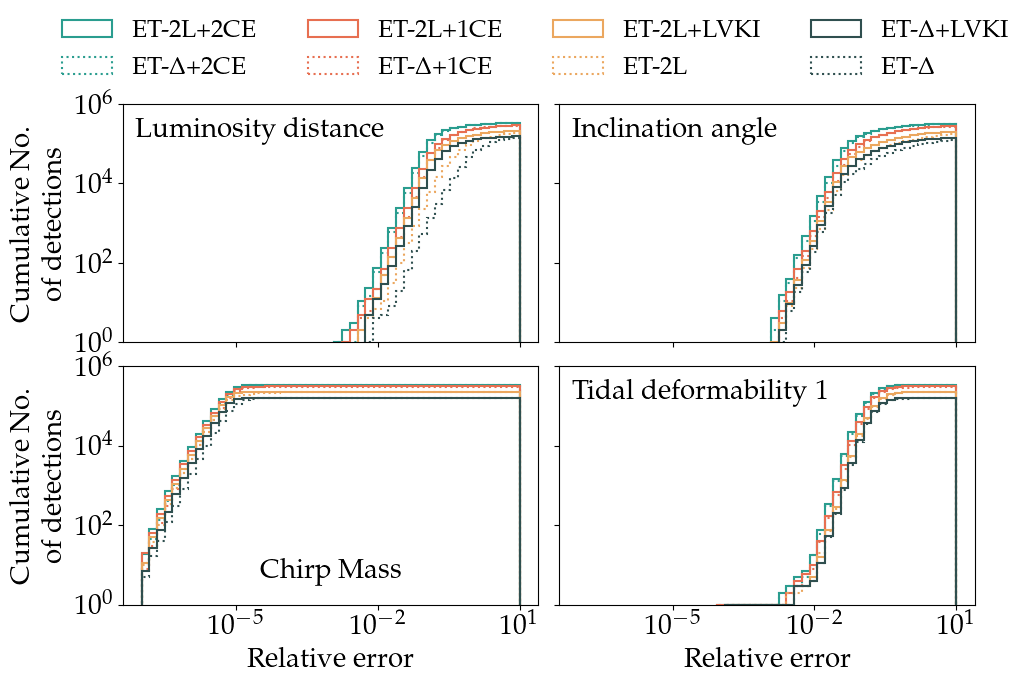

In [27]:
alpha = '1.0'
eos = 'BLh_gaussian'

mpl.rc('xtick', labelsize = 20) 
mpl.rc('ytick', labelsize = 20)

# plot cumulative histograms of relative errors
fig, axs = plt.subplots(2,2,figsize = (11,6.5), sharex = True, sharey = True)

ax = axs.ravel()

for i in range(len(detectors_ntw)):
    df = pd.read_csv('%s/%s/%s/%s/Errors_%s_%s_%s.txt' %(str(PATH_TO_DATA), str(alpha), str(eos), 
                        str(detectors_ntw[i]), str(alpha), str(eos), str(detectors_ntw[i])),
                        names = lbs, skiprows = 1, delimiter = ' ')

    if i%2 == 0:
        my_linestyle = 'solid'
    else:
        my_linestyle = 'dotted'

    # relative errors
    for j, param in enumerate(params):
        ax[j].hist(df['err_%s' %param]/df[param], bins = np.logspace(-7, 1, 50), cumulative = True, color = colors[i], 
                histtype='step', linestyle=my_linestyle, linewidth=my_linewidth)
        #sns.histplot(df['err_%s' %param]/df[param], binwidth = 0.25, cumulative = True, color = colors[i], fill=False,
        #        element='step', linestyle=my_linestyle, linewidth=my_linewidth, ax = ax[j], log_scale=(True, True))
        if j%2 == 0:
            ax[j].set_ylabel('Cumulative No. \n of detections', fontsize = 20)
        else:
            ax[j].set_ylabel('')
        
        ax[j].legend(title=xaxis_lbs_list[j], title_fontsize = 20, frameon=False)
        ax[j].set_xscale('log')
        ax[j].set_yscale('log')
        #ax[j].set_xlim(10**-7, 10)
        ax[j].set_ylim(1, 10**6)

ax[2].set_xlabel('Relative error', fontsize = 20)
ax[3].set_xlabel('Relative error', fontsize = 20)
fig.subplots_adjust(hspace = 0.1, wspace = 0.05)
fig.legend(lbs_list, loc='upper center', fontsize=18, ncols=4, bbox_to_anchor=(0.5, 1.045), frameon=False)
plt.savefig('plots/kn_param_errs_alpha%s_%s.pdf' %(alpha, eos), bbox_inches='tight')
plt.show()


/var/folders/h7/9cf4n2f137zdvy422j_dnbcw0000gn/T/ipykernel_92882/3016124240.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[j].legend(title=xaxis_lbs_list[j], title_fontsize = my_fontsize, frameon=False)
/var/folders/h7/9cf4n2f137zdvy422j_dnbcw0000gn/T/ipykernel_92882/3016124240.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[j].legend(title=xaxis_lbs_list[j], title_fontsize = my_fontsize, frameon=False)
/var/folders/h7/9cf4n2f137zdvy422j_dnbcw0000gn/T/ipykernel_92882/3016124240.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[j].legend(title=xaxis_lbs_list[j], title_fontsize = my_fontsize, f

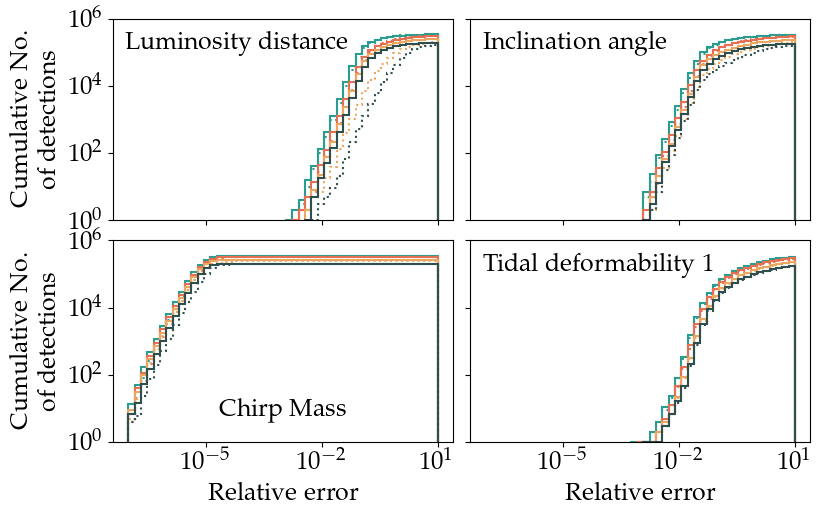

In [29]:
alpha = '1.0'
eos = 'APR4_uniform'

my_fontsize=18

mpl.rc('xtick', labelsize = my_fontsize) 
mpl.rc('ytick', labelsize = my_fontsize)

# plot cumulative histograms of relative errors
fig, axs = plt.subplots(2,2,figsize = (9,5.5), sharex = True, sharey = True)

ax = axs.ravel()

for i in range(len(detectors_ntw)):
    df = pd.read_csv('%s/%s/%s/%s/Errors_%s_%s_%s.txt' %(str(PATH_TO_DATA), str(alpha), str(eos), 
                        str(detectors_ntw[i]), str(alpha), str(eos), str(detectors_ntw[i])),
                        names = lbs, skiprows = 1, delimiter = ' ')

    if i%2 == 0:
        my_linestyle = 'solid'
    else:
        my_linestyle = 'dotted'

    # relative errors
    for j, param in enumerate(params):
        ax[j].hist(df['err_%s' %param]/df[param], bins = np.logspace(-7, 1, 50), cumulative = True, color = colors[i], 
                histtype='step', linestyle=my_linestyle, linewidth=my_linewidth)
        #sns.histplot(df['err_%s' %param]/df[param], binwidth = 0.25, cumulative = True, color = colors[i], fill=False,
        #        element='step', linestyle=my_linestyle, linewidth=my_linewidth, ax = ax[j], log_scale=(True, True))
        if j%2 == 0:
            ax[j].set_ylabel('Cumulative No. \n of detections', fontsize = my_fontsize)
        else:
            ax[j].set_ylabel('')
        
        ax[j].legend(title=xaxis_lbs_list[j], title_fontsize = my_fontsize, frameon=False)
        ax[j].set_xscale('log')
        ax[j].set_yscale('log')
        #ax[j].set_xlim(10**-7, 10)
        ax[j].set_ylim(1, 10**6)

ax[2].set_xlabel('Relative error', fontsize = my_fontsize)
ax[3].set_xlabel('Relative error', fontsize = my_fontsize)
fig.subplots_adjust(hspace = 0.1, wspace = 0.05)
#fig.legend(lbs_list, loc='upper center', fontsize=18, ncols=4, bbox_to_anchor=(0.5, 1.045), frameon=False)
plt.savefig('plots/kn_param_errs_alpha%s_%s.pdf' %(alpha, eos), bbox_inches='tight')
plt.show()


/var/folders/h7/9cf4n2f137zdvy422j_dnbcw0000gn/T/ipykernel_92882/1884962258.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[j].legend(title=xaxis_lbs_list[j], title_fontsize = my_fontsize, frameon=False)
/var/folders/h7/9cf4n2f137zdvy422j_dnbcw0000gn/T/ipykernel_92882/1884962258.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[j].legend(title=xaxis_lbs_list[j], title_fontsize = my_fontsize, frameon=False)
/var/folders/h7/9cf4n2f137zdvy422j_dnbcw0000gn/T/ipykernel_92882/1884962258.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[j].legend(title=xaxis_lbs_list[j], title_fontsize = my_fontsize, f

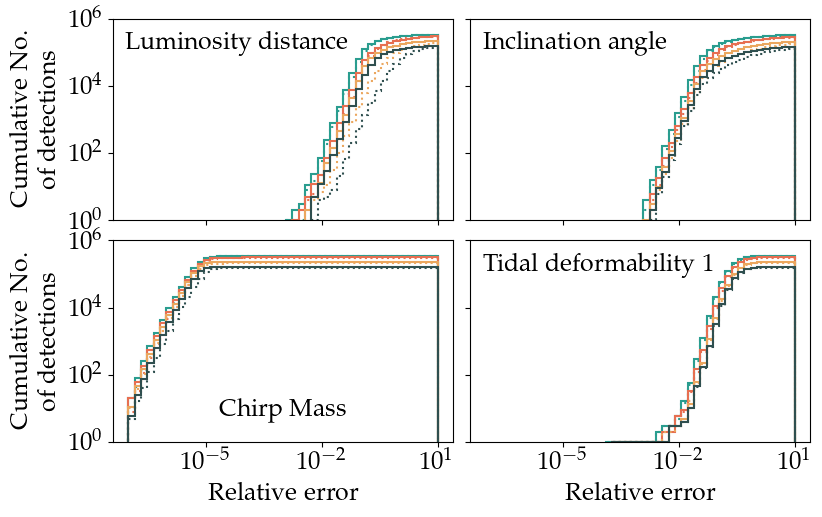

In [26]:
alpha = '1.0'
eos = 'APR4_gaussian'

my_fontsize = 18
mpl.rc('xtick', labelsize = my_fontsize) 
mpl.rc('ytick', labelsize = my_fontsize)

# plot cumulative histograms of relative errors
fig, axs = plt.subplots(2,2,figsize = (9,5.5), sharex = True, sharey = True)

ax = axs.ravel()

for i in range(len(detectors_ntw)):
    df = pd.read_csv('%s/%s/%s/%s/Errors_%s_%s_%s.txt' %(str(PATH_TO_DATA), str(alpha), str(eos), 
                        str(detectors_ntw[i]), str(alpha), str(eos), str(detectors_ntw[i])),
                        names = lbs, skiprows = 1, delimiter = ' ')

    if i%2 == 0:
        my_linestyle = 'solid'
    else:
        my_linestyle = 'dotted'

    # relative errors
    for j, param in enumerate(params):
        ax[j].hist(df['err_%s' %param]/df[param], bins = np.logspace(-7, 1, 50), cumulative = True, color = colors[i], 
                histtype='step', linestyle=my_linestyle, linewidth=my_linewidth)
        #sns.histplot(df['err_%s' %param]/df[param], binwidth = 0.25, cumulative = True, color = colors[i], fill=False,
        #        element='step', linestyle=my_linestyle, linewidth=my_linewidth, ax = ax[j], log_scale=(True, True))
        if j%2 == 0:
            ax[j].set_ylabel('Cumulative No. \n of detections', fontsize = my_fontsize)
        else:
            ax[j].set_ylabel('')
        
        ax[j].legend(title=xaxis_lbs_list[j], title_fontsize = my_fontsize, frameon=False)
        ax[j].set_xscale('log')
        ax[j].set_yscale('log')
        #ax[j].set_xlim(10**-7, 10)
        ax[j].set_ylim(1, 10**6)

ax[2].set_xlabel('Relative error', fontsize = my_fontsize)
ax[3].set_xlabel('Relative error', fontsize = my_fontsize)
fig.subplots_adjust(hspace = 0.1, wspace = 0.05)
#fig.legend(lbs_list, loc='upper center', fontsize=18, ncols=4, bbox_to_anchor=(0.5, 1.045), frameon=False)
plt.savefig('plots/kn_param_errs_alpha%s_%s.pdf' %(alpha, eos), bbox_inches='tight')
plt.show()
